# DSCI 100 Project Report: Using Age and Maximum Heart Rate Achieved as a Predictor for Heart Disease. 

#### Beth Koschel, 

## Introduction

**Background:** Heart disease is a term that encompasses several different types of heart conditions(1). The most common condition is know as coronary artery disease (CAD) which can lead to decreased blood flow to the heart resulting in a heart attack (1). As a prominent cause of mortality in Canada, heart disease underscores the significance of investigating factors that may contribute to its development (3).

**Question:** We want to know if age and maximum heart rate achieved might play a role in the presence or absence of heart disease.

**ID and Describe the dataset used:** The dataset we are using to answer this question is heart disease dataset from the Cleveland provided to us through the UC Irvine Machine Learning Repository (3). It contains 14 attributes including age, sex, a chest pain scale, resting blood pressure, serum cholesterol, fasting blood sugar levels, resting electrocardiograph results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by fluoroscopy, and diagnosis of heart disease.

## Methods

### Data Pre-processing

EDIT THIS:
Imported libraries and processed.cleveland.data dataset from the internet.

Cleaned and tidied data to make it usable, by assigning column types and adding a new column, diag.

Split the data into training and testing sets, working only with the training set until the very end.

Summarized the training set to make predictions about how we want our classifier to work.

Visualized the relationship between thalac and chol to get a deeper understanding of how the data is distributed.

### Exploratory Data Analysis

#### Importing Libraries

In [88]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(ggplot2)
library(dplyr) 


# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

In [89]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Importing the Data

The read_csv function was used to import the data (processed.cleveland.data)

In [90]:
# reading the data from data/process.cleveland.data
heart_data <- read_delim("data/processed.cleveland.data", delim=",", col_names = FALSE)

head(heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Figure : 

#### Cleaning and Tidying the Heart Disease Data

##### Setting the Seed

In [91]:
# setting the seed to 1
set.seed(1)

##### Renaming the Columns

In [92]:
set.seed(1)

# renaming the columns
heart_data <- rename(heart_data,
                    age = X1,
                    sex = X2,
                    cp = X3,
                    trestbps = X4,
                    chol = X5,
                    fbs = X6,
                    restecg = X7,
                    thalach = X8,
                    exang = X9,
                    oldpeak = X10,
                    slope = X11,
                    ca = X12,
                    thal = X13,
                    num = X14)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Figure : 

##### Removing "?" from the data and replacing it with "NA"

In [93]:
set.seed(1)

# removing "?" from data and replacing it with NA
heart_data[heart_data == "?"] <- NA 

#removing all data with NA
heart_data <- heart_data |> drop_na()

##### Adding a New Column 

Num needs to be true or false (presence of disease or no presence of disease). Renaming to Diagnosis where 0 means no disease and 1 means disease

In [94]:
set.seed(1)

# adding diagnosis column and setting the values to 'TRUE' if the cell value is > 0 or 'FALSE' if the cell value is 0
heart_data <- heart_data |>
    mutate(diagnosis = as.factor(ifelse(is.na(num), NA, (num > 0))))

##### Selecting Columns

In [95]:
set.seed(1)

# selecting columns 
heart_clean <- heart_data |>
    select(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, num, diagnosis)
head(heart_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,FALSE


Figure : 

#### Creating Training and Testing Datasets

ADD TEXT EXPLAINING

In [96]:
set.seed(1)

# splitting dataframe into training and testing datasets
heart_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

head(heart_training)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0,FALSE
49,1,2,130,266,0,0,171,0,0.6,1,0,FALSE


Figure : 

#### Summarizing the Data

EXPLAIN WHY WE ARE DOING THIS

In [97]:
# getting the patient, count, percentage, min, max, and mean of each predictor
num_obs <- nrow(heart_training)
heart_summary <- heart_training |> 
    group_by(diagnosis) |>
    summarize(
        num_of_patients = n(),
        percentage = n()/num_obs * 100,
        min_age = min(age),
        max_age = max(age),
        mean_age = mean(age),
        min_thalach = min(chol),
        max_thalach = max(chol),
        mean_thalach = mean(chol)) 

heart_summary

diagnosis,num_of_patients,percentage,min_age,max_age,mean_age,min_thalach,max_thalach,mean_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,120,54.05405,29,76,52.15833,126,417,242.8917
TRUE,102,45.94595,35,70,56.55882,131,409,250.0196


Figure :

#### Relationship Visualization 

EXPLAIN HOW WE DID IT

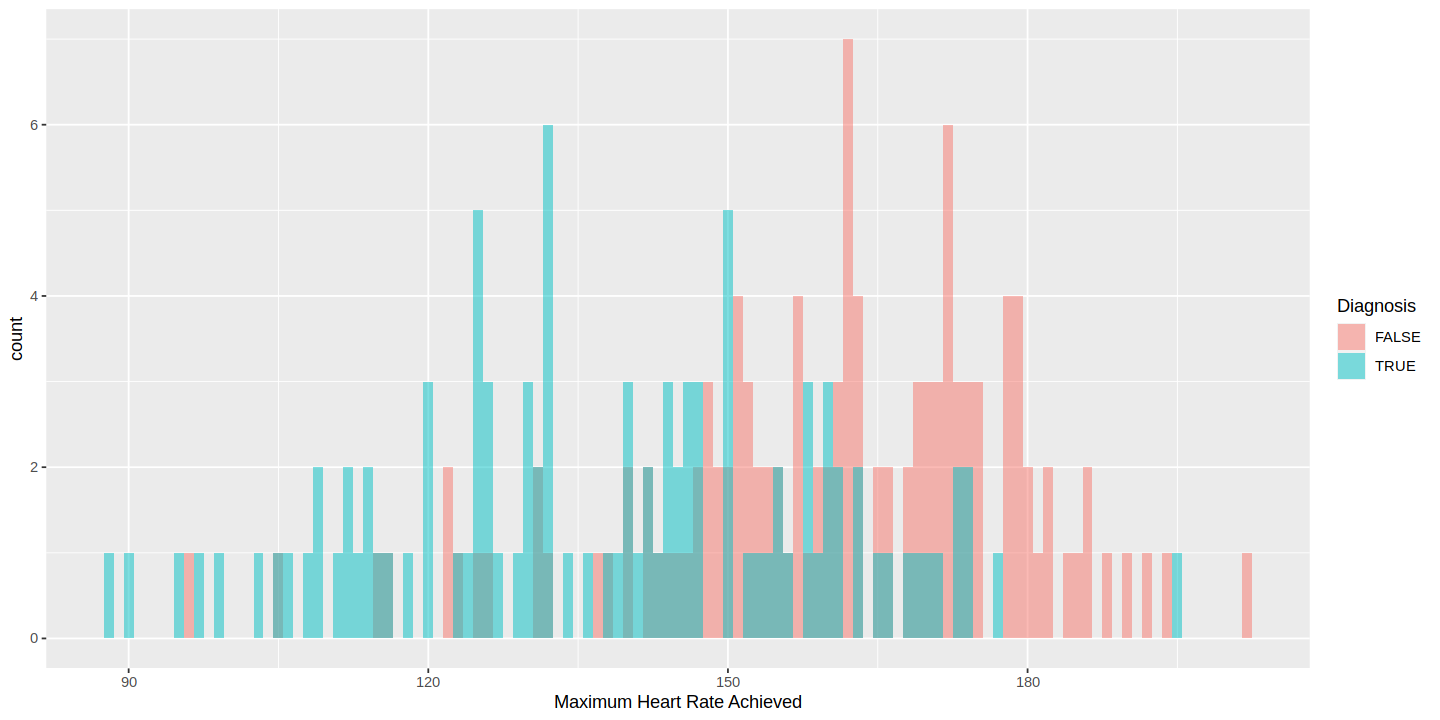

In [98]:
set.seed(1)

#plotting the training data
plot1 <- ggplot(heart_training, aes(x = thalach, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity", binwidth = 1) +
    labs(x = "Maximum Heart Rate Achieved", fill = "Diagnosis")
plot1

Figure :

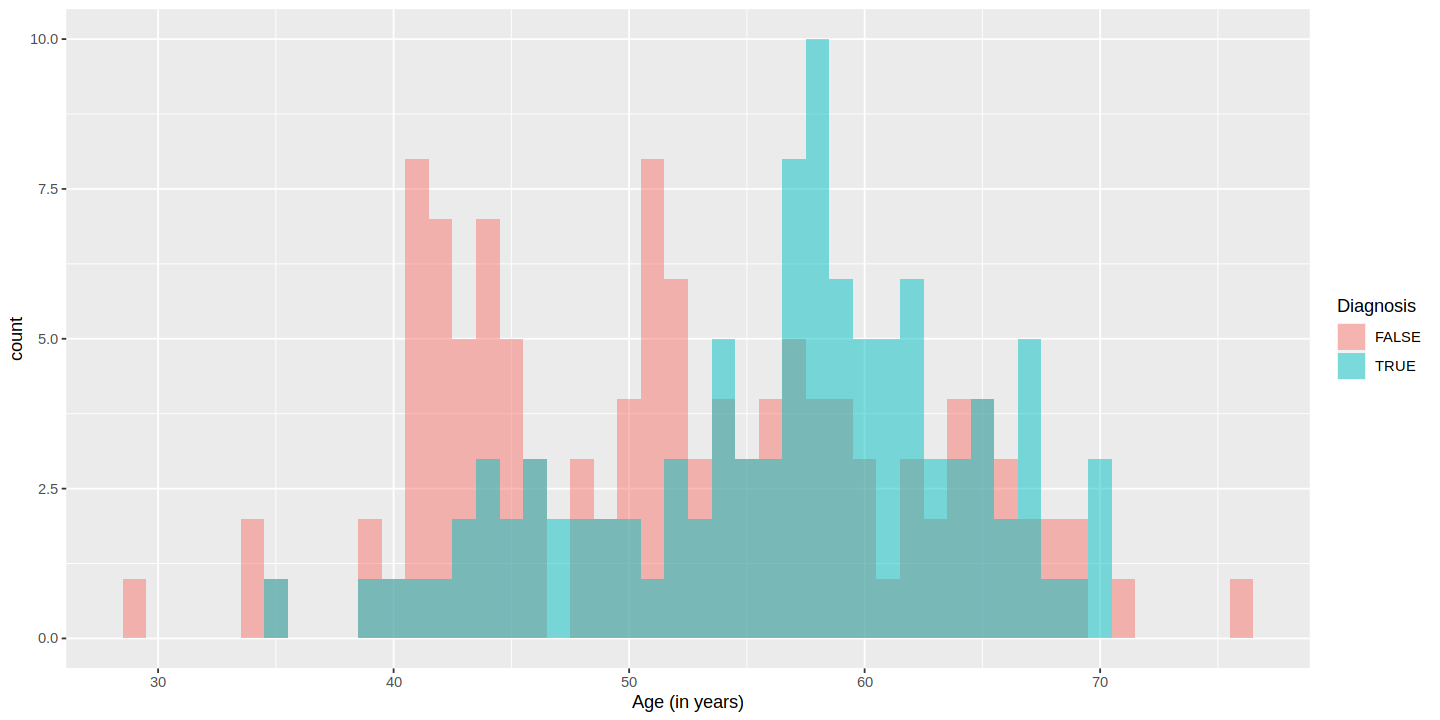

In [99]:
set.seed(1)

#plotting the training data
plot2 <- ggplot(heart_training, aes(x = age, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity", binwidth = 1) +
    labs(x = "Age (in years)", fill = "Diagnosis")
plot2

Figure :

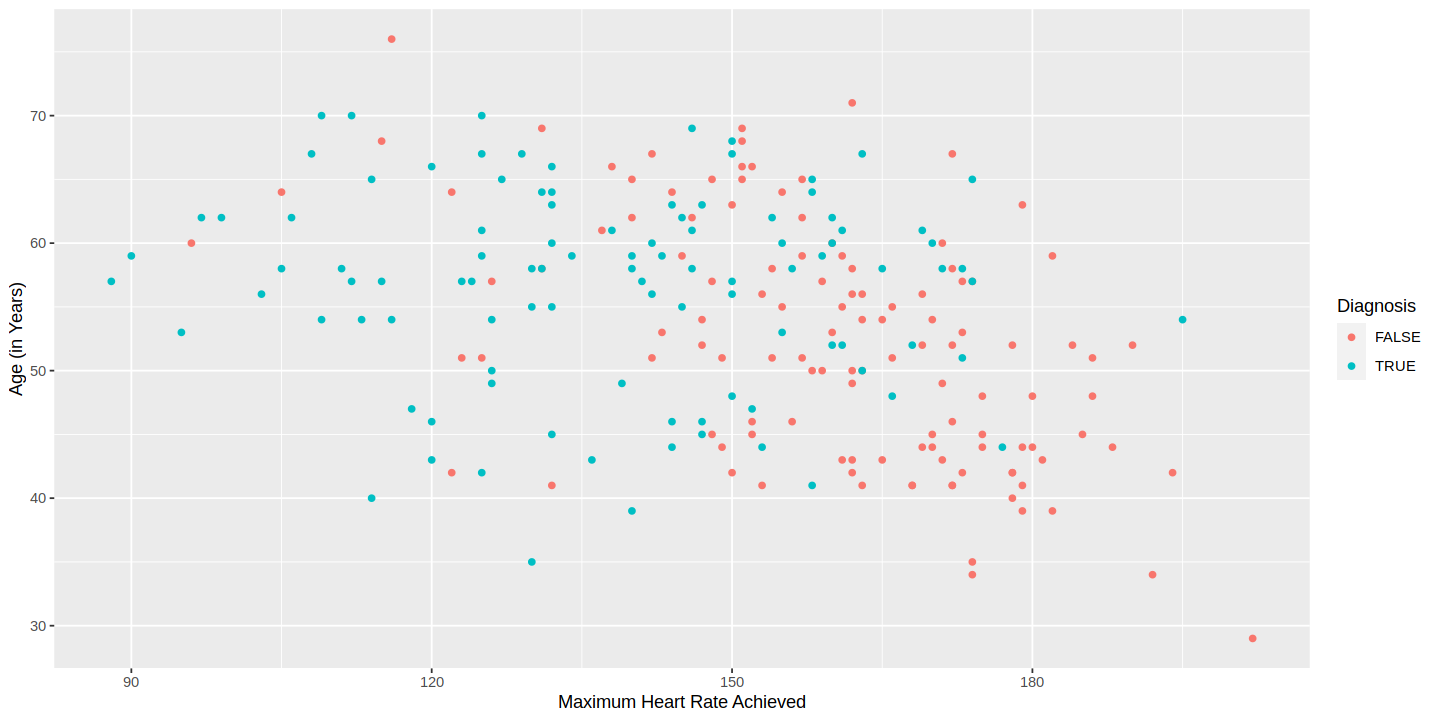

In [100]:
set.seed(1)

# plotting training data
plot3 <- ggplot(heart_training, aes(x = thalach, y = age, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Maximum Heart Rate Achieved", y = "Age (in Years)", color = "Diagnosis")
plot3

Figure : 

FINAL EXPLANATION BEFORE MOVING TO FINDING K VALUE

### Finding Best K Value

#### Creating a Model

EXPLAIN 

In [101]:
set.seed(1)

# K-nearest neighbors model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# standardizing the data
heart_recipe <- recipe(diagnosis ~ thalach + age, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_scale(all_predictors())

heart_vfold <- vfold_cv(heart_training, v = 10, strata = diagnosis)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))


knn_result <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_result |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))
head(accuracies)

neighbors,mean
<dbl>,<dbl>
16,0.7254941
11,0.7252964
21,0.7118577
26,0.7116601
46,0.7069170
31,0.7025692


Figure :

#### Visualizating Accuracy

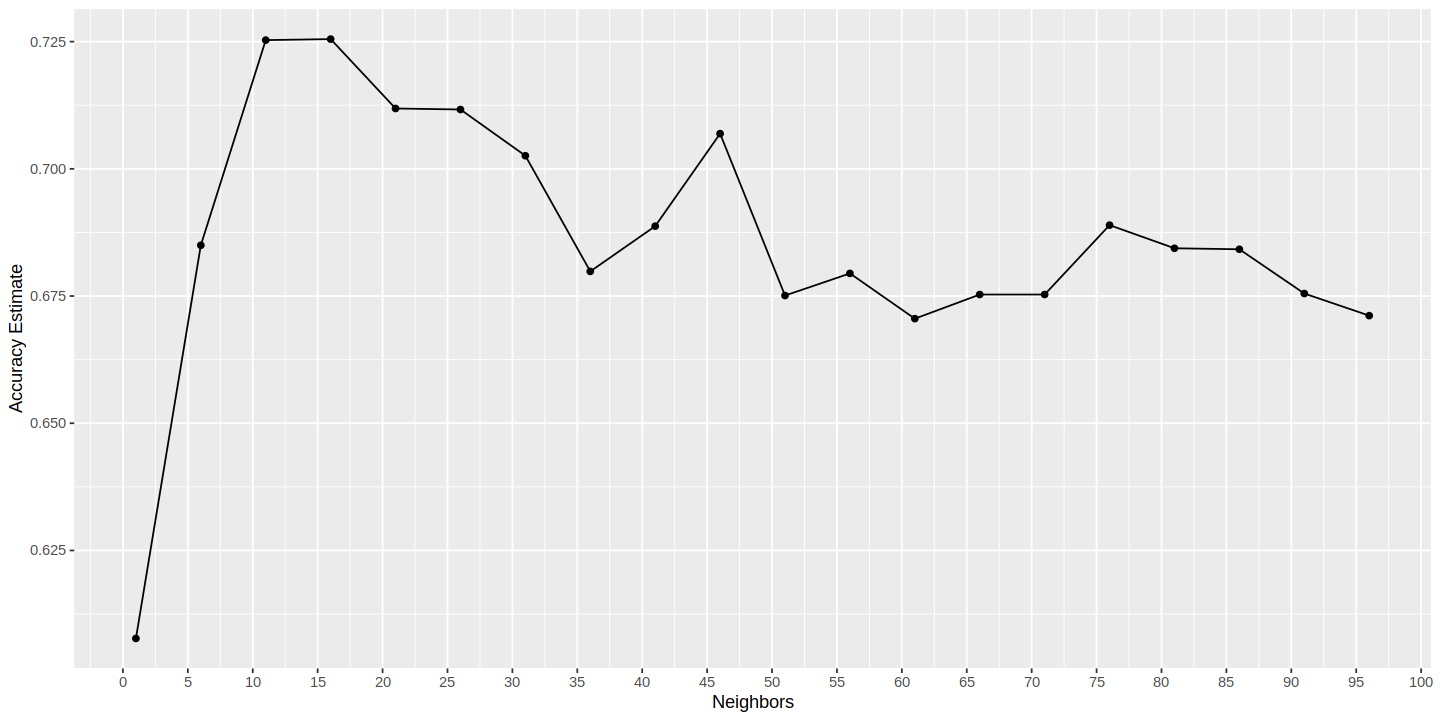

In [102]:
# creating a geom_line plot for accuracy 
accuracy_v_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) 
accuracy_v_k

Figure :

### Building the Model

Explain

In [103]:
set.seed(1)
# creating the final specification with our chosen K value
model_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
    set_engine("kknn") |>
    set_mode("classification")
model_spec

# creating the final workflow for our training data
model_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(model_spec) |>
    fit(data = heart_training)
model_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 16
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2792793
Best kernel: rectangular
Best k: 16

### Testing the Classifier - Accuracy and Confusion Matrix

In [104]:
set.seed(1)

# predictions
model_predictions <- predict(model_fit, heart_testing) |>
    bind_cols(heart_testing) 
head(model_predictions) 

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
FALSE,37,1,3,130,250,0,0,187,0,3.5,3,0,FALSE
FALSE,56,1,2,120,236,0,0,178,0,0.8,1,0,FALSE
FALSE,57,0,4,120,354,0,0,163,1,0.6,1,0,FALSE
FALSE,44,1,2,120,263,0,0,173,0,0.0,1,0,FALSE
FALSE,52,1,3,172,199,1,0,162,0,0.5,1,0,FALSE
FALSE,48,1,2,110,229,0,0,168,0,1.0,3,1,TRUE


Figure :

In [105]:
set.seed(1)

# find the accuracy of the predictions
model_metrics <- model_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class) |>
    filter(.metric == "accuracy")
model_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.68


Figure :

In [106]:
set.seed(1)

# confusion matrix
model_conf_mat <- model_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)
model_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE    27   11
     TRUE     13   24

Figure :

## Discussion

## References

1.
2. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging
3. 